#🏁 CAR PRICE PREDICTION MULTIPLE LINEAR REGRESSION

🚗 Testes de modelos de Machine Learning para entender os fatores que afetam o preço dos carros a partir de um conjunto de dados de diferentes tipos de carros do mercado.

Referência: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction



##ANÁLISE DOS DADOS

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
import pandas as pd
import numpy as np
car_table = pd.read_csv("/content/drive/MyDrive/Hands-On Machine Learning with Scikit-Learn & TensorFlow/CarPrice_Assignment.csv")
display(car_table)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [147]:
car_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [148]:
car_table.price.describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


In [149]:
car_table.price.median()

10295.0

### Verificações

1. Se há valores ausentes

In [150]:
car_table.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


2. Mostrar valores únicos

In [151]:
car_table.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

3. Quantidade de vezes que cada valor aparece na tabela

In [152]:
car_table.fueltype.value_counts()

,count
fueltype,
gas,185
diesel,20


In [153]:
car_table.fuelsystem.value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [154]:
sedan = car_table.carbody.map(lambda n: "sedan" in n).sum()
cb = car_table.carbody.map(lambda n: "convertible" in n).sum()
pd.Series([sedan, cb], index=['sedan','convertible'])

,0
sedan,96
convertible,6


In [155]:
car_table.groupby(['carbody']).price.agg([len, 'min', 'max'])

,len,min,max
carbody,,,
convertible,6,11595.0,37028.0
hardtop,8,8249.0,45400.0
hatchback,70,5118.0,31400.5
sedan,96,5499.0,41315.0
wagon,25,6918.0,28248.0


4. Transformação de 'centralização'


*   Etapa comum de pré-processamento antes da aplicação de algoritmos de ML
*   Obtenção dos desvios de cada preço em relação à média



In [156]:
car_table.price - car_table.price.mean()

,price
0,218.289429
1,3223.289429
2,3223.289429
3,673.289429
4,4173.289429
...,...
200,3568.289429
201,5768.289429
202,8208.289429
203,9193.289429


5. Custo-benefício em relação à potência



In [157]:
idx = (car_table.horsepower/car_table.price).idxmax()
car_table.loc[idx, 'CarName']

'toyota corona liftback'

### Encoding the Categorical Data

In [161]:
car_table['fueltype']=car_table['fueltype'].replace({'gas':0, 'diesel':1}).infer_objects(copy=False)
car_table['aspiration']=car_table['aspiration'].replace({'std':0, 'turbo':1}).infer_objects(copy=False)
car_table['doornumber']=car_table['doornumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8}).infer_objects(copy=False)
car_table['carbody']=car_table['carbody'].replace({'sedan':0, 'hardtop':1, 'convertible':2, 'hatchback':3, 'wagon':4}).infer_objects(copy=False)
car_table['drivewheel']=car_table['drivewheel'].replace({'fwd':0, 'rwd':1, '4wd':2}).infer_objects(copy=False)
car_table['cylindernumber']=car_table['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}).infer_objects(copy=False)
car_table['enginelocation']=car_table['enginelocation'].replace({'front':0, 'rear':1}).infer_objects(copy=False)
car_table['enginetype']=car_table['enginetype'].replace({'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}).infer_objects(copy=False)
car_table['fuelsystem']=car_table['fuelsystem'].replace({'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}).infer_objects(copy=False)



In [159]:
car_table.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,2,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,2,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,3,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## MODELOS

In [131]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xgb

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Alvo: preço
y = car_table.price

In [134]:
# Características
X = car_table.drop(['CarName','price','car_ID','symboling'],axis=1)

In [135]:
X.describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.180488,3.121951,1.609756,0.458537,0.014634,98.756585,174.049268,65.907805,53.724878,...,4.380488,126.907317,0.990244,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,0.297446,0.385535,0.994966,1.613030,0.581148,0.120377,6.021776,12.337289,2.145204,2.443522,...,1.080854,41.642693,1.306058,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,2.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,...,4.000000,97.000000,0.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,...,4.000000,120.000000,1.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,...,4.000000,141.000000,1.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,...,12.000000,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


* Divisão dos dados entre treinamento e validação
---
* test_size = 0.1: 90% dos dados são de treinamento e 10% são de teste.
* random_state: para garantir que a divisão dos dados seja a mesma em diferentes

 execuções de código. Valores diferentes geram diferentes sequências de aleatoriedade.
---

In [163]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state=1)

### 1. Modelo Random Forest Regressor

Utiliza múltiplas árvores de decisão para fazer previsões. São feitas muitas árvores de decisão para reduzir o overfitting.

A previsão é a média das previsões de todas as árvores.

In [137]:
model1 = RandomForestRegressor(n_estimators = 50, criterion = 'absolute_error', random_state = 1)
model1.fit(train_X, train_y)
val_predictions = model1.predict(val_X)

Métrica:

* MAE: Erro Absoluto Médio.
  
  Calcula a média das diferenças absolutas entre os valores previstos e os valores reais.

In [138]:
print(MAE(val_y, val_predictions))

1140.6704752380954


### 2. Modelo Linear Regressor

Há uma relação entre uma variável dependente e uma ou mais variáveis independentes.

É assumido que a relação entre as variáveis é linear.

In [73]:
model2 = LinearRegression()
model2.fit(train_X, train_y)
train_predictions2 = model2.predict(train_X)
val_predictions2 = model2.predict(val_X)

Métrica:
* R²: Coeficiente de determinação.

  Mede a proporção da variância dos dados. Varia entre 0 e 1.

In [74]:
print(r2_score(train_y, train_predictions2))

0.8965133738465324


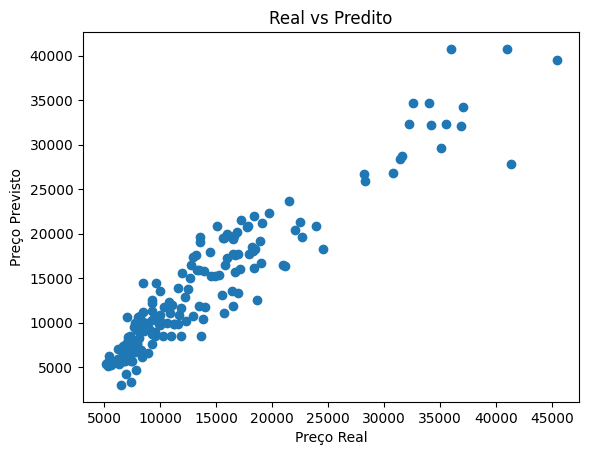

In [75]:
plt.scatter(train_y, train_predictions2)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Real vs Predito")
plt.show()

In [76]:
print(r2_score(val_y, val_predictions2))

0.5802590919561106


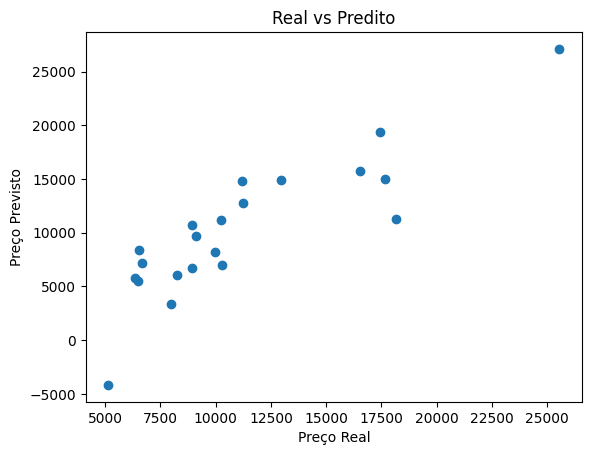

In [77]:
plt.scatter(val_y, val_predictions2)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Real vs Predito")
plt.show()

### 3. Modelo Lasso Regressor

Variante da regressão linear que adiciona uma penalização à magnitude dos coeficientes

das variáveis independentes, ajudando a reduzir o overfitting.

In [80]:
model3 = Lasso()
model3.fit(train_X, train_y)
train_predictions3 = model3.predict(train_X)
val_predictions3 = model3.predict(val_X)

In [81]:
print(r2_score(train_y, train_predictions3))

0.896489833272123


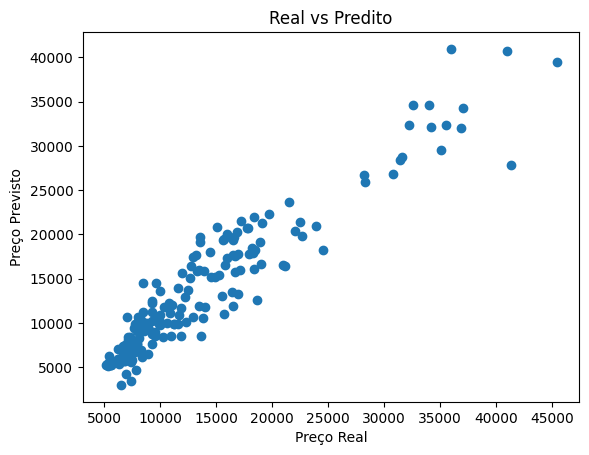

In [82]:
plt.scatter(train_y, train_predictions3)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Real vs Predito")
plt.show()

In [83]:
print(r2_score(val_y, val_predictions3))

0.5858540725750426


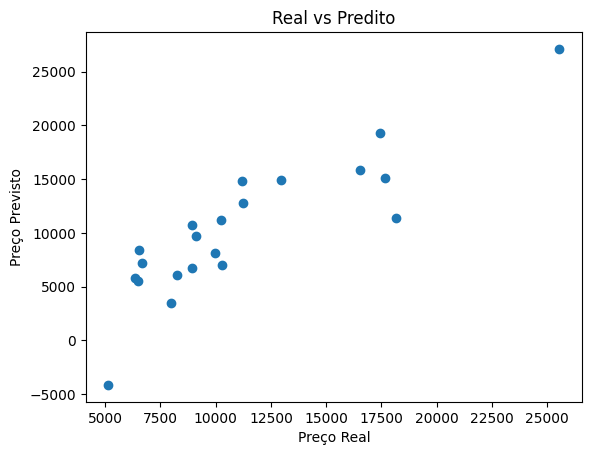

In [62]:
plt.scatter(val_y, val_predictions3)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Real vs Predito")
plt.show()

### 4. Modelo XGBoost Regressor

Extreme Gradient Boosting: é baseado na técnica de gradient boosting,

em que  treina-se árvores de decisão de forma sequencial, de modo que

cada árvore nova corrige os erros das árvores anteriores.

In [106]:
model4 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.1, max_depth=5)
model4.fit(train_X, train_y)
train_predictions4 = model4.predict(train_X)
val_predictions4 = model4.predict(val_X)

Métricas:

* MSE: Erro Quadrático Médio.

  É a média dos quadrados das diferenças entre os valores reais e os valores previstos.
  
  Pode ser sensível a outliers.

* RMSE: raiz quadrada do MSE.

In [142]:
# RMSE
print(np.sqrt(MSE(train_y, train_predictions4)))

622.7959869279584


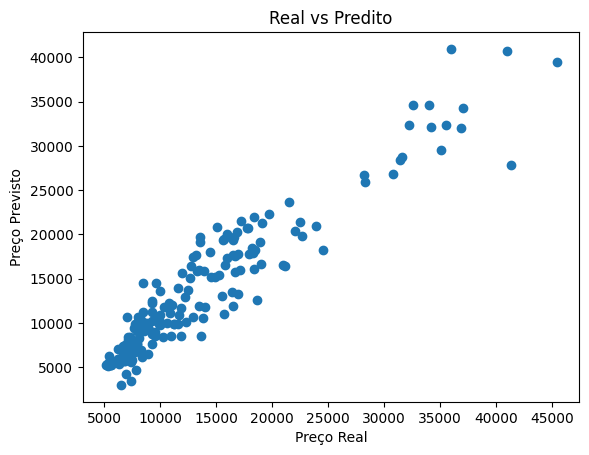

In [144]:
plt.scatter(train_y, train_predictions3)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Real vs Predito")
plt.show()

In [143]:
# RMSE
print(np.sqrt(MSE(val_y, val_predictions4)))

1950.2825933530314


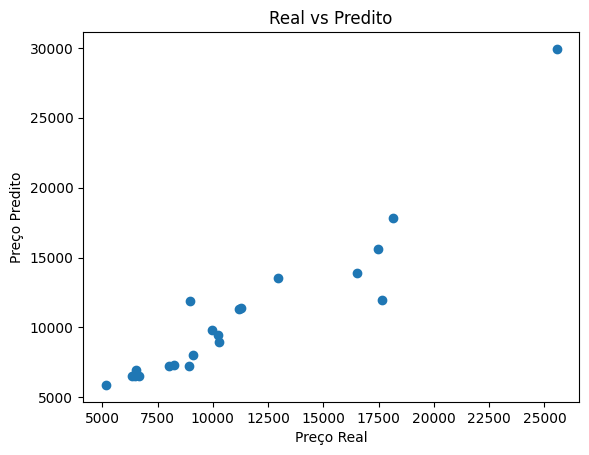

In [108]:
plt.scatter(val_y, val_predictions4)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Real vs Predito")
plt.show()